### 手書き文字判別　のデータ準備
        kerasのサイトからデータを読み込み、機械学習の学習用　及び　テスト用データに変換
        
        Xtrain  ダウンロードしたままのデータ　
        Xtest
        ytrain
        ytest
        
        X_train：学習用に加工した画像データ　　１次元化　データ値 0-1
        y_train：学習用の画像データに対応した正解値　onehot化
        X_test
        y_test

In [2]:
#　kerasから　mnistデータ（手書き数字）を読み込む
import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt   # 画像表示のモジュールを読み込む


(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

# numpyの配列として取り込み.shape で　取り込んだデータの構造を確認できる
print('Xtrain shape',format(Xtrain.shape))  #train_imagesのデータ構造を表示
     #　このデータは３次元のテンソル（画像の数、画像行数、画像列数）
print('Xtest shape',Xtest.shape)    #「.shape」：データフレームの構造を表示させるコマンド
print('ytrain shape',ytrain.shape)
print('ytest shape',ytest.shape)


C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Xtrain shape (60000, 28, 28)
Xtest shape (10000, 28, 28)
ytrain shape (60000,)
ytest shape (10000,)


In [4]:
Xtrain[0:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

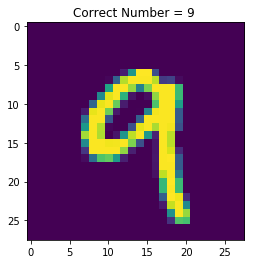

In [5]:
#　画像データを表示する
image_no=110 #表示する画像番号

digit = Xtrain[image_no]            # train_imagesのimage_no番目の画像を取り出す

import matplotlib.pyplot as plt   # 画像表示のモジュールを読み込む

plt.imshow(digit)
plt.title('Correct Number = {} '. format(ytrain[image_no]))
plt.show()


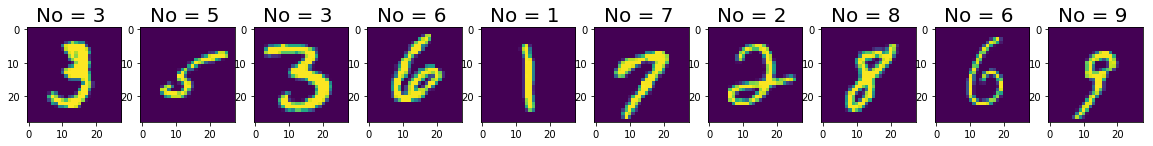

In [6]:
image_no=10        #表示する最初の画像番号　ここから10画像表示

fig, ax = plt.subplots(1,10,figsize=(20,5))

for i in range(10):
    ax[i].imshow(Xtrain[image_no+i] )
    ax[i].set_title('No = {} '. format(ytrain[image_no+i]),fontsize=20)

#### データを　学習用データに形状変更する
    １．画像データを　1行のデータに並べ替える
    ２．画素値の値を　0-1のfloatに変更する    
    ３．正解データ　0-9のラベル出力を　categoricalに変更
    　　　（10個の0-1に相当する箱　正解値が１で他は０

In [7]:
#　データの形状変更
#　28x28画素の画像データを１列の数字の並びに変更　0-1のfloatに変更

X_train = Xtrain.reshape(60000,28*28)#画像データをフラットなデータに変換
X_train = X_train.astype('float32')/255#データを0-1のfloatに変換

X_test = Xtest.reshape(10000,28*28)
X_test = X_test.astype('float32')/255


print('Xtrain shape',format(Xtrain.shape))
print('X_train shape',format(X_train.shape))
print('X_test shape',format(X_test.shape))



Xtrain shape (60000, 28, 28)
X_train shape (60000, 784)
X_test shape (10000, 784)


In [8]:
X_train[0:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
# ラベルの準備
#　0-9のラベル出力を　categoricalに変更

from keras.utils import to_categorical

y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)

print('ytrain shape',format(ytrain.shape))
print('y_train shape',format(y_train.shape))
print('y_test shape',format(y_test.shape))


ytrain shape (60000,)
y_train shape (60000, 10)
y_test shape (10000, 10)


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
y_train[0:2]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
# 作成したデータセットを保存

np.save('DATA/Xtrain.npy',Xtrain)
np.save('DATA/Xtest.npy',Xtest)
np.save('DATA/ytrain.npy',ytrain)
np.save('DATA/ytest.npy',ytest)

np.save('DATA/X_train.npy',X_train)
np.save('DATA/X_test.npy',X_test)
np.save('DATA/y_train.npy',y_train)
np.save('DATA/y_test.npy',y_test)